<a href="https://colab.research.google.com/github/limkaram/Natural_language_processing_with_deep_learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 로지스틱 회귀(Logistic Regression)

* 분류(Classification) 문제를 풀때 많이 활용되는 알고리즘
* 이진 분류를 예로 어떠한 데이터를 기다 아니다로 분류를 해야하는 경우 정답 또한 0 or 1로 구분 지어져야함
* 하지만 기존 Linear Regression과 다르게 입력 데이터를 그래프로 표현해보면, y축은 0 or 1이므로 S자 형태로 표현이 됨
* 따라서 0.5보다 크면 1이다(기다), 0.5보다 작으면 0이다(아니다)라고 분류할 수 있게 끔 해주기 위해 0~1 사이의 값으로 S자 형태를 가지는 Sigmoid 함수를 활용하는 것

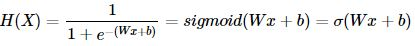

In [ ]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

1. Sigmoid 함수 Weight 및 Bias 조정시 변화 확인

In [ ]:
# Weight 조정시

def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [ ]:
# Bias 조정시

def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

2. Logistic Regression Cost Function
* Linear Regression에서의 Loss Function인 MSE를 그대로 활용하여 그래프를 그리면 아래와 같이 나온다.
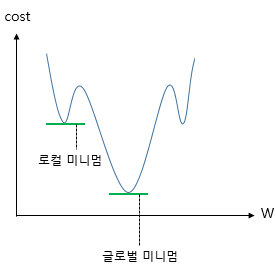
* 우리가 구해야하는 것은 글로벌 미니엄에 해당하는 최적의 W, b 값인데 로컬 미니멈으로 인해 더 최적의 값(글로벌 미니엄)이 있음에도 잘못된 최소 값을 찾은 것으로 인지 할 수 있어 새로운 비용 함수가 필요하다.
* 실제 값이 0일경우 예측 값(Hypothesis)이 0에 가까울수록 비용(Loss)가 작아지고, 1에 가까울 수록 커지는 형태를 가지고 있어야한다.(반대로 실제 값이 1일 경우 예측 값이 0에 가까울 수록 비용이 커지고, 1에 가까울 수록 정답과 같아지므로 Loss가 작아지는 형태의 그래프가 필요하다)
* 이러한 형태를 가지고 있는 그래프를 log로 구현하여 Cost Function으로 활용하며, 이를 Cross Entropy 함수라한다.
* 결과적으로 로지스틱 회귀는 비용함수로 크로스 엔트로피 함수를 활용하고, 전체를 더하여 평균을 취한 값을 통해 가중치를 최적화한다.
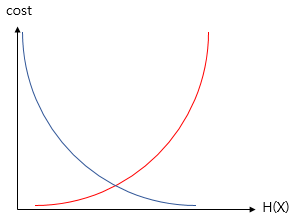

* 파란선 : 실제 값이 1인 경우
* 빨간선 : 실제 값이 0인 경우
* H(X) : 예측 값


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

X=np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y=np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X, y, batch_size=1, epochs=200, shuffle=False)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [ ]:
print(model.predict([1, 2, 3, 4, 4.5, 5]))
print(model.predict([11, 21, 31, 41, 500]))